In [46]:
import torchvision
import cv2
import matplotlib.pyplot as plt

In [47]:
# Example using Faster R-CNN with a ResNet-50 backbone (PyTorch)
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained = True)
model.eval(); # Set model to evaluation mode

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [84]:
image = plt.imread('jungle.jpg')
image_tensor = torchvision.transforms.functional.to_tensor(image)

In [85]:
outputs = model([image_tensor])
predictions = outputs[0]["boxes"].data.numpy()
classes = outputs[0]["labels"].data.numpy()
scores = outputs[0]["scores"].data.numpy()

In [86]:
predictions, classes, scores

(array([[414.75064 , 214.39737 , 621.4139  , 294.11978 ],
        [ 46.535637, 231.32645 , 160.55952 , 393.56775 ],
        [ 98.140495, 233.7098  , 217.27934 , 348.05313 ],
        [255.12842 , 237.62991 , 342.97092 , 270.3036  ]], dtype=float32),
 array([25, 24, 24, 24]),
 array([0.9993388 , 0.9991553 , 0.99868137, 0.9965996 ], dtype=float32))

In [87]:
labels = ["person", "bicycle", "car", "motorcycle", "airplane", "bus", "train", "truck", "boat", "traffic light", "fire hydrant", "stop sign", "parking meter", "bench", "bird", "cat", "dog", "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe", "backpack", "umbrella", "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard", "sports ball", "kite", "baseball bat", "baseball glove", "skateboard", "surfboard", "tennis racket", "bottle", "wine glass", "cup", "fork", "knife", "spoon", "bowl", "banana", "apple", "sandwich", "orange", "broccoli", "carrot", "hot dog", "pizza", "donut", "cake", "chair", "couch", "potted plant", "bed", "dining table", "toilet", "tv", "laptop", "mouse", "remote", "keyboard", "cell phone", "microwave", "oven", "toaster", "sink", "refrigerator", "book", "clock", "vase", "scissors", "teddy bear", "hair drier", "toothbrush"]

In [92]:
len(labels)

80

In [88]:
labels[22]

'zebra'

In [89]:
for prediction, class_id, score in zip(predictions, classes, scores):
  x1,y1,x2,y2 = prediction.astype(int)
  cv2.rectangle(image, (x1, y1), (x2,y2), (0, 255, 0), 2)
  # cv2.putText(image, f"{model.names[class_id]} {score:.2f}, (x1,y1- 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5,(0, 255, 0), 2")
  cv2.putText(image, f"{labels[class_id-2]} {score:.2f}", (x1,y1 - 5), cv2.FONT_HERSHEY_PLAIN, 1.5,(0, 255, 0), 2)

In [90]:
cv2.putText?

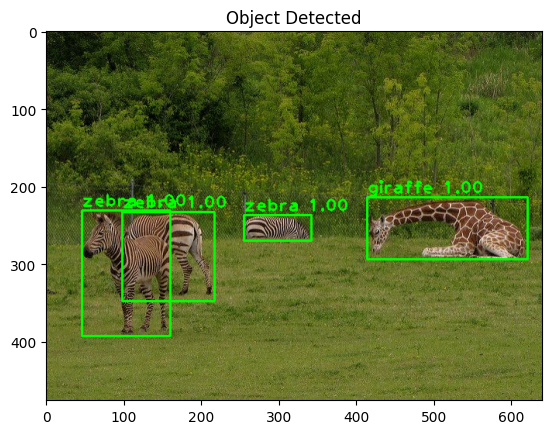

In [91]:
plt.title("Object Detected")
plt.imshow(image)